In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy as sp
from scipy import stats
import pickle
import calendar

## Utility Functions

In [2]:
def Examine_Nulls(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df

In [3]:
def Save_Var(data, save_name):
    with open(str(save_name + ".data"), 'wb') as f:
        pickle.dump(data, f)
        
    try:
        with open(str(save_name + ".data"), 'rb') as f:
            new_data = pickle.load(f)
    except:
        print("Error: saving not successful")
    else:
        print(str(save_name + ".data" + " saved succesfully"))

def Load_Var(save_name):
    with open(save_name, 'rb') as f:
        data = pickle.load(f)
    return data 

In [4]:
def MAE(yData, yPred):
    return np.nanmean(np.abs(yPred - yData))

## Load and Process Data

In [5]:
merged_df_ = pd.read_csv("C:\\Users\\quintoj\\Desktop\\AHCCD_Combined\\Data\\ahccd_interp.csv", index_col=['Station','Longitude (Decimal Degrees)', 'Latitude (Decimal Degrees)', 'Prov', 'Date'])
# merged_df_ = merged_df_.drop('Unnamed: 0', axis=1)
merged_df_.reset_index(inplace=True)
merged_df_['Date'] = pd.to_datetime(merged_df_['Date'])
merged_df_['Station'] = merged_df_['Station'].astype(str)

provinces = np.unique(merged_df_['Prov'])
months = np.unique(merged_df_['Date'].dt.month)

ir_era5 = Load_Var('C:\\Users\\quintoj\\Desktop\\AHCCD_Combined\\Data_Files\\iso_t2m.data')

C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [28]:
merged_df_[(merged_df_['Prov'].isin(atlantic)) & (merged_df_['Date'].dt.month == 1)]

Station  Longitude (Decimal Degrees)  Latitude (Decimal Degrees)  \
1573260  8100300                       -67.72                       46.71   
1573261  8100300                       -67.72                       46.71   
1573262  8100300                       -67.72                       46.71   
1573263  8100300                       -67.72                       46.71   
1573264  8100300                       -67.72                       46.71   
...          ...                          ...                         ...   
1703365  8300100                       -62.60                       46.07   
1703366  8300100                       -62.60                       46.07   
1703367  8300100                       -62.60                       46.07   
1703368  8300100                       -62.60                       46.07   
1703369  8300100                       -62.60                       46.07   

        Prov       Date  Min_Temp  Max_Temp  Mean_Temp  snow_frac  preds_iso  
1573260   NB 1930-01-01     -17.2       3.9       -6.7   1.000000   0.848413  
1573261   NB 1930-01-02     -17.2       4.4       -6.4   0.000000   0.829205  
1573262   NB 1930-01-03       0.0       2.2        1.1   0.435049   0.472804  
1573263   NB 1930-01-08       3.9       8.9        6.4   0.000000   0.003991  
1573264   NB 1930-01-09      -9.4      -8.9       -9.2   0.000000   0.996069  
...      ...        ...       ...       ...        ...        ...        ...  
1703365  PEI 2016-01-16     -12.0      -2.0       -7.0   1.000000   0.986618  
1703366  PEI 2016-01-19     -12.0      -5.5       -8.8   1.000000   0.994751  
1703367  PEI 2016-01-26      -9.5       6.5       -1.5   0.000000   0.643046  
1703368  PEI 2016-01-29      -2.5       0.5       -1.0   1.000000   0.874474  
1703369  PEI 2016-01-30      -5.0       1.0       -2.0   1.000000   0.891951  

[12605 rows x 10 columns]

In [50]:
def replace_nulls(x):
    if pd.isnull(x['preds_iso']) is True:
        if x['Mean_Temp'] > 0:
            return 0
        elif x['Mean_Temp'] < 0:
            return 1
    else:
        return x['preds_iso']
    
mm = merged_df_.copy()
mm['filled_preds_iso'] = mm.apply(replace_nulls, axis=1)
mm

Station  Longitude (Decimal Degrees)  Latitude (Decimal Degrees)  \
0        1012010                      -123.56                       48.71   
1        1012010                      -123.56                       48.71   
2        1012010                      -123.56                       48.71   
3        1012010                      -123.56                       48.71   
4        1012010                      -123.56                       48.71   
...          ...                          ...                         ...   
1771378  709CEE9                       -78.28                       48.80   
1771379  709CEE9                       -78.28                       48.80   
1771380  709CEE9                       -78.28                       48.80   
1771381  709CEE9                       -78.28                       48.80   
1771382  709CEE9                       -78.28                       48.80   

        Prov       Date  Min_Temp  Max_Temp  Mean_Temp  snow_frac  preds_iso  \
0         BC 1913-10-03       6.7      15.2       11.0    0.00000   0.000146   
1         BC 1913-10-04       4.5      12.2        8.4    0.00000   0.001415   
2         BC 1913-10-07       7.3       5.3        6.3    0.00000   0.002029   
3         BC 1913-10-09       1.4      10.1        5.8    0.00000   0.037402   
4         BC 1913-10-10       2.7      10.6        6.7    0.00000   0.009413   
...      ...        ...       ...       ...        ...        ...        ...   
1771378  QUE 2015-11-06       0.5      14.0        7.3    0.00000   0.060969   
1771379  QUE 2015-11-19       4.5      13.0        8.8    0.18132   0.001285   
1771380  QUE 2015-11-21      -7.0      -1.0       -4.0    1.00000   0.968332   
1771381  QUE 2015-11-24     -20.5      -3.5      -12.0    1.00000   0.994839   
1771382  QUE 2015-11-28     -18.5      -7.0      -12.8    1.00000   0.997005   

         filled_preds_iso  
0                0.000146  
1                0.001415  
2                0.002029  
3                0.037402  
4                0.009413  
...                   ...  
1771378          0.060969  
1771379          0.001285  
1771380          0.968332  
1771381          0.994839  
1771382          0.997005  

[1771383 rows x 11 columns]

In [51]:
np.unique(np.isnan(mm['filled_preds_iso']))

array([False])

## Define Regions

In [44]:
# from scipy.stats import ttest_ind
# # Use t-tests to compare provinces/regions
# def run_ttest(df, region1, region2):
#     df1 = merged_df_[(merged_df_['Prov'] == region1)]
#     df1 = df1[['Mean_Temp', 'snow_frac']]
#     df2 = merged_df_[(merged_df_['Prov'] == region2)]
#     df2 = df2[['Mean_Temp', 'snow_frac']]
    
#     p_value =  ttest_ind(df1['Mean_Temp'].values, df2['Mean_Temp'].values).pvalue    
#     if p_value < 0.01:
#         different=True
#     else:
#         different=False
#     return (different, p_value)
# run_ttest(merged_df_, 'ONT', 'BC')

In [6]:
eastern = ['ONT', 'QUE']
nunavut = ["NU"]
atlantic = ["NB", "PEI", "NS"]
praries = ["ALTA", "MAN", "SASK"]
bc = ["BC"]
territories = ["NWT", "YT"]

## Bootstrapping

In [66]:
mm_ = mm.copy()
mm_ = mm_[mm_['Prov'].isin(atlantic)]
mm_.groupby(mm_['Date'].dt.month).mean()['snow_frac']

Date
1     0.644013
2     0.671298
3     0.507579
4     0.214976
5     0.015122
6     0.000160
7     0.000001
8     0.000000
9     0.000256
10    0.022788
11    0.180608
12    0.516089
Name: snow_frac, dtype: float64

In [62]:
def Bootstrap(df, region, K=10000):
    df = df[df['Prov'].isin(region)]
    df = df[['Date', 'Mean_Temp', 'snow_frac', 'filled_preds_iso']]
    ub_list_mae, lb_list_mae, mid_list_mae = [], [], []
    ub_list_diff, lb_list_diff, mid_list_diff = [], [], []
    ub_sf_list, lb_sf_list, mid_sf_list = [], [], []
    ub_list_preds, lb_list_preds, mid_list_preds = [], [], []
    actual = []
    
    # Average snow fraction values/month
    month_sf_mean = df.groupby(df['Date'].dt.month).mean()['snow_frac'].values
    
    for month in range(1, 13):
        test = df.copy() 
        test = test[['Date', 'Mean_Temp', 'snow_frac', 'filled_preds_iso']]
        
        # Select desired month for bootstrapping
        test = test[test['Date'].dt.month == month]

        # Actual predictions 
        x = test['Mean_Temp']
        y = test['snow_frac']
        y_preds = test['filled_preds_iso'] 
        test['Difference'] = list(np.abs(y - y_preds))
        actual.append(MAE(y, y_preds))

        test_mean = test.groupby(test['Date'].dt.year).mean()
        N_block = len(test_mean)
        choices = np.random.choice(N_block, replace=True, size=(N_block, K))

        resampled = test_mean.values[choices]
        resampled_y  = resampled[:, :, 1]
        resampled_preds = resampled[:, :, 2]
        resampled_diffs = resampled[:, :, 3]
        
        # Calculate MAE for every 'column' (block)
        errors = []
        for i in range(resampled_y.shape[1]):
            errors.append(MAE(resampled_y[:, i], resampled_preds[:, i]))
            
        lb_mae = np.percentile(errors, 2.5)
        ub_mae = np.percentile(errors, 97.5)
        mid_mae = np.percentile(errors, 50)
        
        lb_list_mae.append(lb_mae)
        ub_list_mae.append(ub_mae)
        mid_list_mae.append(mid_mae)
        
        # Calculate mean difference between predicted and actual snow fraction
        diffs = np.nanmean(resampled_diffs, axis=0)
        
        lb_diff = np.percentile(diffs, 2.5)
        ub_diff = np.percentile(diffs, 97.5)
        mid_diff = np.percentile(diffs, 50)
        
        lb_list_diff.append(lb_diff)
        ub_list_diff.append(ub_diff)
        mid_list_diff.append(mid_diff)
        
        # Calculate mean snow fraction per month 
        mean_sf = np.nanmean(resampled_y, axis=0)
        lb_sf = np.percentile(mean_sf, 2.5)
        ub_sf = np.percentile(mean_sf, 97.5)
        mid_sf = np.mean(mean_sf)
        
        lb_sf_list.append(lb_sf)
        ub_sf_list.append(ub_sf)
        mid_sf_list.append(mid_sf)
        
        # Calculate mean predictions
        preds = np.nanmean(resampled_preds, axis=0)
        
        lb_preds = np.percentile(preds, 2.5)
        ub_preds = np.percentile(preds, 97.5)
        mid_preds = np.nanmean(preds)
        
        lb_list_preds.append(lb_preds)
        ub_list_preds.append(ub_preds)
        mid_list_preds.append(mid_preds)
        
#         # Calculate difference b/w mean_preds and observations
#         diffs = np.abs(mean_sf - preds)
        
#         lb_diff = np.percentile(diffs, 2.5)
#         ub_diff = np.percentile(diffs, 97.5)
#         mid_diff = np.percentile(diffs, 50)
        
#         lb_list_diff.append(lb_diff)
#         ub_list_diff.append(ub_diff)
#         mid_list_diff.append(mid_diff)

    return [lb_list_mae, ub_list_mae, mid_list_mae, 
            lb_list_diff, ub_list_diff, mid_list_diff, 
            lb_sf_list, ub_sf_list, mid_sf_list, month_sf_mean, actual,
            lb_list_preds, ub_list_preds, mid_list_preds]

In [54]:
def ErrBar(vals, list1, list2):
    return np.array(
        [[abs(i-j) for i, j in zip(list1, vals)],
         [abs(i-j) for i, j in zip(list2, vals)]]
    )

In [88]:
def BS_Plot(df, region, title):
    data = Bootstrap(df, region)
    
    month_titles = [calendar.month_name[i] for i in months]  
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    plt.xticks(rotation=60)
    ax.set_xlabel('Month')
    ax.set_ylim(-5, 105)
    plt.rcParams.update({'font.size': 12})
    
    diffs = ax.errorbar(
        month_titles, 
        [i*100 for i in data[5]],
        yerr=ErrBar([i*100 for i in data[5]], [i*100 for i in data[3]], [i*100 for i in data[4]]),
        linestyle='--', 
        c='r',
        label="Mean Absolute Error",
        capsize=5,
        markersize=5,
        marker='o'
    )
    ax.set_ylabel("Snow Fraction (%)")
    # # Plot mean snow fraction line
    sfs = ax.errorbar(
        month_titles, 
        [i*100 for i in data[8]], 
        yerr= ErrBar([i*100 for i in data[8]], [i*100 for i in data[6]], [i*100 for i in data[7]]),
        linestyle='-',
        label='Mean Snow Fraction',
        marker='o',
        capsize=5,
        markersize=5,
        c='g'
    )
# # Plot mean prediction line
    preds = ax.errorbar(
        month_titles, 
        [i*100 for i in data[13]], 
        yerr= ErrBar([i*100 for i in data[13]], [i*100 for i in data[11]], [i*100 for i in data[12]]),
        linestyle='--',
        label='Mean Model Prediction',
        marker='o',
        capsize=5,
        markersize=5,
        c='b'
    )
    ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(str('Figures/' + title + '_1axis' + '.png'))

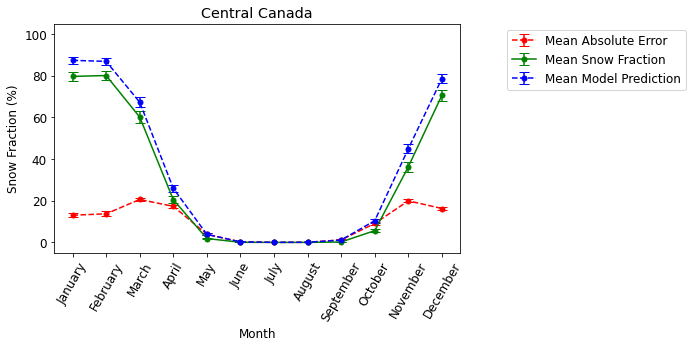

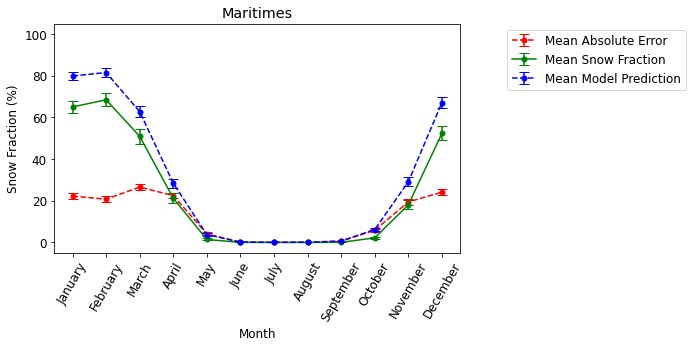

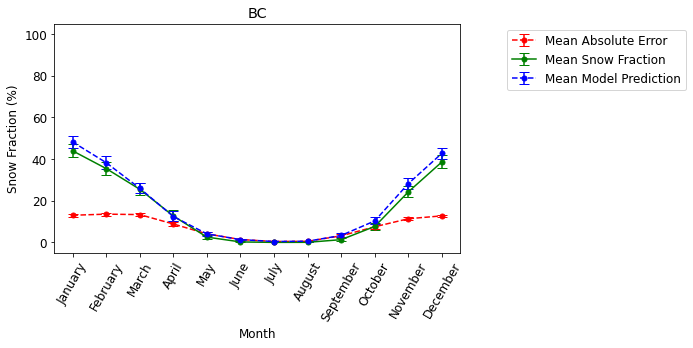

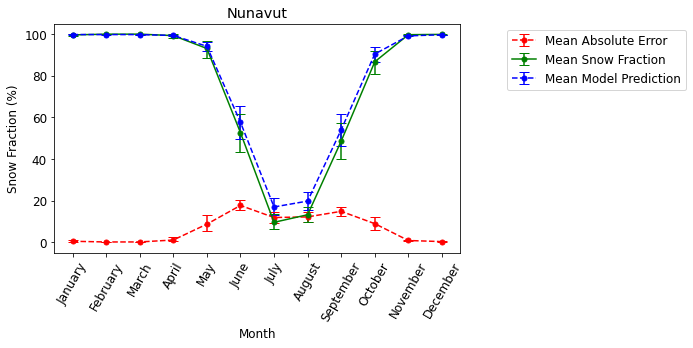

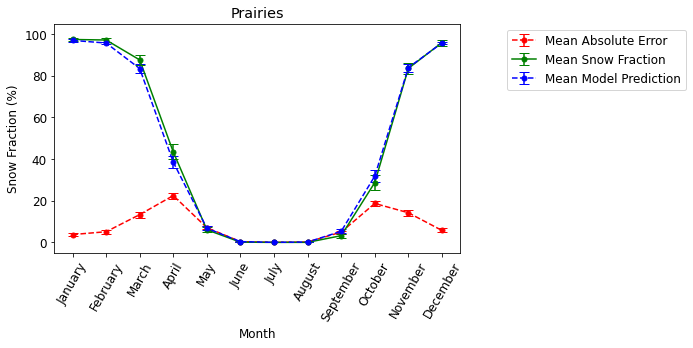

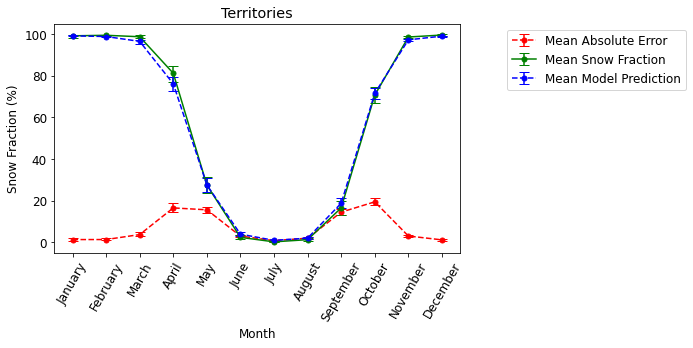

In [89]:
month_titles = [calendar.month_name[i] for i in months]
regions = [eastern, atlantic, bc, nunavut, praries, territories]
titles = ['Central Canada', 'Maritimes', 'BC', 'Nunavut', 'Prairies', 'Territories']
# colors = ['g', 'b', 'r', 'magenta', 'black', 'orange', 'seagreen']\
# regions=[eastern]
# titles = ['ONT/QUE']

for title, region in zip(titles, regions):
    BS_Plot(mm, region, title)

## Testing

In [30]:
# Select one region
merged_df = merged_df_[merged_df_['Prov'].isin(atlantic)]
merged_df = merged_df[['Date', 'Mean_Temp', 'snow_frac', 'preds_iso']]

test = merged_df.copy() 
test = test[['Date', 'Mean_Temp', 'snow_frac', 'preds_iso']]

# Select desired month for bootstrapping
test = test[test['Date'].dt.month == 1]

# Calculate difference b/w actual values and predictions 
x = test['Mean_Temp']
y = test['snow_frac']
y_preds = test['preds_iso'] 
test['Difference'] = list(np.abs(y - y_preds))

# Average over one month and bootstrap per year
test_mean = test.groupby(test['Date'].dt.year).mean()
test_mean

Mean_Temp  snow_frac  preds_iso  Difference
Date                                             
1915   1.245455   0.560628   0.547018    0.191042
1916  -5.300000   0.735754   0.903140    0.186575
1917  -4.810000   0.600000   0.720353    0.236825
1918  -9.350000   0.752132   0.923185    0.174986
1919  -3.206667   0.487586   0.765187    0.335305
...         ...        ...        ...         ...
2012  -4.200000   0.625685   0.763718    0.252770
2013  -7.341860   0.764661   0.838919    0.105816
2014  -3.430769   0.516711   0.637797    0.230948
2015  -7.404651   0.771801   0.856349    0.115058
2016  -3.217857   0.822489   0.789004    0.186580

[102 rows x 4 columns]

In [31]:
K = 100000
N_block = np.unique(test['Date'].dt.year).shape[0]
choices = np.random.choice(N_block, replace=True, size=(N_block, K))

In [32]:
choices.shape

(102, 100000)

In [33]:
# Bootstrap
resampled = test_mean.values[choices]
resampled_y  = resampled[:, :, 1]
resampled_preds = resampled[:, :, 2]
resampled_diffs = resampled[:, :, 3]

In [34]:
resampled_y

array([[0.48758605, 0.86354793, 0.79193791, ..., 0.83458673, 0.79316214,
        0.67144935],
       [0.92307692, 0.33482889, 0.86354793, ..., 0.72172779, 0.56364181,
        0.77180057],
       [0.7521321 , 0.76351585, 0.56364181, ..., 0.47734785, 0.76466067,
        0.76351585],
       ...,
       [0.79526515, 0.51948367, 0.85028547, ..., 0.60361807, 0.78169194,
        0.62995238],
       [0.89168394, 0.53202613, 0.71772084, ..., 0.93477901, 0.52650078,
        0.4416638 ],
       [0.79158317, 0.44587066, 0.50233149, ..., 0.51671056, 0.82123166,
        0.6201675 ]])

In [35]:
mean_sf = np.mean(resampled_y, axis=0)
lb_sf = np.percentile(mean_sf, 2.5)
ub_sf = np.percentile(mean_sf, 97.5)
mid_sf = np.mean(mean_sf)

In [37]:
np.mean(mean_sf)

0.6501957188122015